# Various simulations related to the signature with the signatory library

### Mechanism for Brownian Motion

In [3]:
pip install torch==1.7.1 --no-cache-dir --force-reinstall

     -------------------------------------- 184.0/184.0 MB 6.6 MB/s eta 0:00:00
     ---------------------------------------- 14.9/14.9 MB 4.8 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2
  Attempting uninstall: torch
    Found existing installation: torch 1.7.1
    Uninstalling torch-1.7.1:
      Successfully uninstalled torch-1.7.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.2 which is incompatible.


In [3]:
import torch

In [5]:
from platform import python_version

print(python_version())

3.9.13


In [6]:
print(torch.__version__)

1.7.1+cpu


In [7]:
pip install ninja

In [9]:
import ninja

In [10]:
pip install signatory==1.2.6.1.7.1 --no-cache-dir --force-reinstall

     ---------------------------------------- 62.8/62.8 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for signatory: filename=signatory-1.2.6.1.7.1-cp39-cp39-win_amd64.whl size=191296 sha256=fc4621b6e077c1bfd243e3baeb554bbb653468d20e5a0c3407764fdc333bad7f
  Stored in directory: C:\Users\vjeko\AppData\Local\Temp\pip-ephem-wheel-cache-z8hqaeuv\wheels\7f\e8\24\06bc3e16e581c4f0059a12ac02bcb9bd11abe1a6afadcc9122
Successfully built signatory
  Attempting uninstall: signatory
    Found existing installation: signatory 1.2.6.1.9.0
    Uninstalling signatory-1.2.6.1.9.0:
      Successfully uninstalled signatory-1.2.6.1.9.0
Note: you may need to restart the kernel to use updated packages.


In [1]:
import signatory

### Trying out the signatory library

In [74]:
# Create a tensor of shape (2, 10, 5)
# Recall that the order of dimensions is (batch, stream, channel)
path = torch.rand(1, 10, 1)
# Take the signature to depth 3
sig = signatory.signature(path, 4)
# sig is of shape (2, 155)

sig

tensor([[ 6.5774e-04,  2.1164e-07, -3.0996e-09, -8.7088e-09]])

In [21]:
# Generate a path X
# Recall that the order of dimensions is (batch, stream, channel)
X = torch.rand(1, 1000, 5)
# Calculate its signature to depth 3
sig_X = signatory.signature(X, 3)

# Generate some more data for the path
Y = torch.rand(1, 7, 5)
# Calculate the signature of the overall path
final_X = X[:, -1, :]
sig_XY = signatory.signature(Y, 3, basepoint=final_X, initial=sig_X)

# This is equivalent to
XY = torch.cat([X, Y], dim=1)
sig_XY = signatory.signature(XY, 3)

In [25]:
np_array = np.array([5, 7, 1, 2, 4, 4])

# Convert Numpy array to torch.Tensor
tensor_a = torch.from_numpy(np_array)
tensor_b = torch.Tensor(np_array)
tensor_c = torch.tensor(np_array)

tensor_b

tensor([5., 7., 1., 2., 4., 4.])

In [33]:
tensor = torch.tensor([1, 2, 3, 4, 5])

np_a = tensor.numpy()
np_b = tensor.detach().numpy()
np_c = tensor.detach().cpu().numpy()

np_a

array([1, 2, 3, 4, 5], dtype=int64)

### Class for Brownians

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [36]:
class Brownian():
    """
    A Brownian motion class constructor
    """
    def __init__(self,x0=0):
        """
        Init class
        """
        assert (type(x0)==float or type(x0)==int or x0 is None), "Expect a float or None for the initial value"
        
        self.x0 = float(x0)
    
    def gen_random_walk(self,n_step=100):
        """
        Generate motion by random walk
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        # Warning about the small number of steps
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution with probability 1/2
            yi = np.random.choice([1,-1])
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def gen_normal(self,n_step=100):
        """
        Generate motion by drawing from the Normal distribution
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution
            yi = np.random.normal()
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w

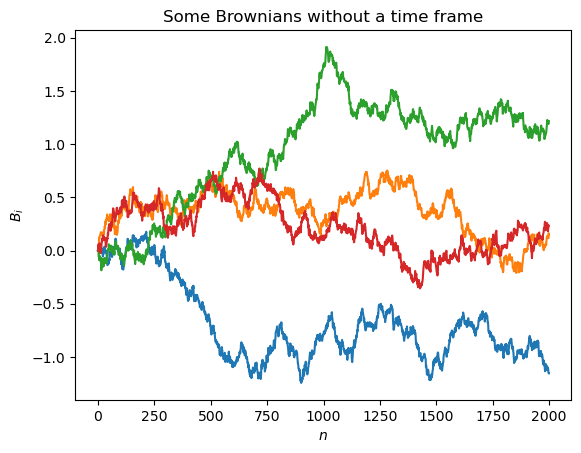

In [37]:
b = Brownian()
for i in range(4):
    plt.plot(1*b.gen_normal(2000))

plt.title("Some Brownians without a time frame")
plt.xlabel("$n$")
plt.ylabel("$B_i$")
plt.show()

### Mechanism for random matrices and vectors

In [38]:
A = np.random.normal(0, 1, size=(3, 2, 4))
v = np.random.normal(0, 1, size=(3))

In [39]:
A, v

(array([[[-0.21203678,  0.60208866,  0.42502197,  0.74376263],
         [ 0.20915583,  0.62009025, -0.2995294 ,  0.31866233]],
 
        [[ 0.34636743, -0.21869301,  2.05560096, -0.25053614],
         [-2.39967121, -0.56949972,  0.70006726,  0.09313866]],
 
        [[-0.9029608 ,  0.59067944, -0.74159763,  1.63977161],
         [-0.49567118, -0.94684158, -1.03601974,  0.86535998]]]),
 array([ 0.16035674, -1.74084333,  0.07842549]))

### Time&step structure

In [40]:
N = 101
T = 1
step = T/N
x_axis = np.linspace(0, T, N)

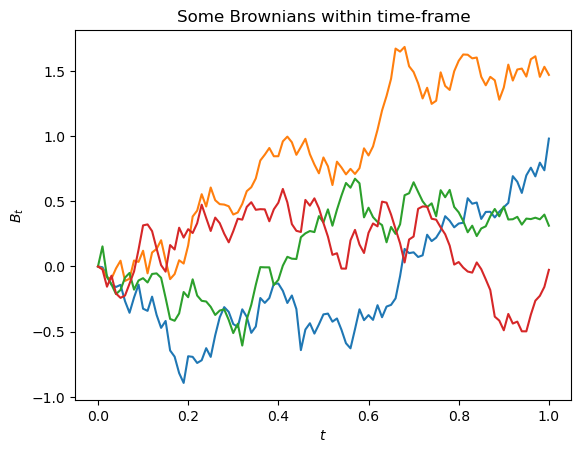

In [41]:
for i in range(4):
    plt.plot(x_axis, b.gen_normal(101))
plt.title("Some Brownians within time-frame")
plt.xlabel("$t$")
plt.ylabel("$B_t$")
plt.show()

## 1-Dimensional Stochastic Double Well

### Constructing the process

In [151]:
b = Brownian()

theta, mu, sigma, y0 = 1, 2, 1, 1
Y = np.zeros(N)
Y[0] = y0
brow = b.gen_normal(N+1)
db =  np.diff(brow)

In [152]:
for i in range(N-1):
    Y[i+1] = Y[i] + theta * Y[i] * (mu - Y[i]*Y[i]) * step + sigma * db[i]

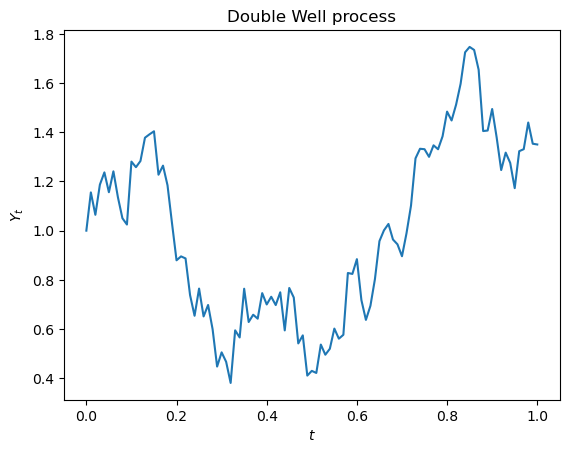

In [153]:
plt.plot(x_axis, Y)
plt.title("Double Well process")
plt.xlabel("$t$")
plt.ylabel("$Y_t$")
plt.show()

### Calculating the true signature of the process

In [154]:
Y.shape

(101,)

In [155]:
k = 10
Y_tens = torch.Tensor(Y)
Y_tens = torch.reshape(Y_tens, (1, N, 1))
Y_tens.shape
Z = np.zeros((N, k))

In [156]:
sig = signatory.signature(Y_tens, k)

In [157]:
sig.shape

torch.Size([1, 10])

In [158]:
sig.numpy().shape

(1, 10)

In [159]:
aux = np.zeros((1,k))
aux[0,0] = 1
aux

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [160]:
Z[0] = aux
aux.shape

(1, 10)

In [161]:
Z

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [162]:
path = torch.rand(1, 1000, 5)
path_class = signatory.Path(path, 3)
sig1 = path_class.signature(0, 40)
sig2 = path_class.signature(300, 600)
sig3 = path_class.signature(400, 990)
sig4 = path_class.signature(700, None)
sig5 = path_class.signature()
sig4.shape

torch.Size([1, 155])

In [163]:
Y_path_class = signatory.Path(Y_tens, k)
sig1 = Y_path_class.signature(0, 7)
sig1

tensor([[2.4134e-01, 2.9123e-02, 2.3429e-03, 1.4136e-04, 6.8232e-06, 2.7445e-07,
         9.4624e-09, 2.8546e-10, 7.6548e-12, 1.8474e-13]])

In [164]:
for i in range(1,N):
    Z[i] = Y_path_class.signature(0, i+1).numpy()
Z[100]

array([3.50560308e-01, 6.14462979e-02, 7.18023628e-03, 6.29285700e-04,
       4.41233860e-05, 2.57854595e-06, 1.29234039e-07, 5.67772940e-09,
       2.23157298e-10, 8.08439427e-12])

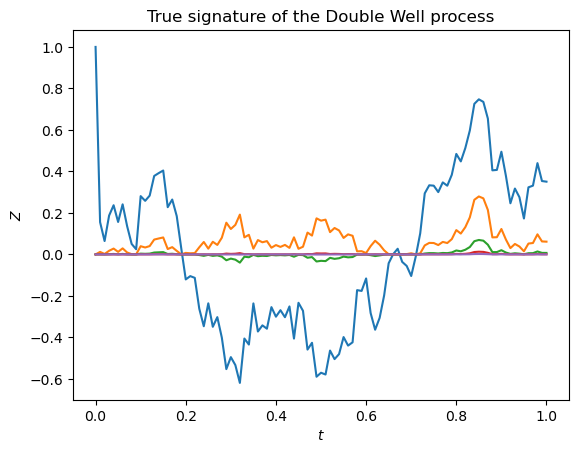

In [165]:
for i in range(5):
    plt.plot(x_axis, Z[:,i])

plt.title("True signature of the Double Well process")
plt.xlabel("$t$")
plt.ylabel("$Z$")
plt.show()

In [166]:
Z.shape

(101, 10)

### Training the linear, time-homogeneous readout - without regularization

In [167]:
model1 = LinearRegression().fit(Z, Y)

In [168]:
r_sq_1 = model1.score(Z, Y)
print(f"coefficient of determination: {r_sq_1}")

coefficient of determination: 0.9912109325958085


In [169]:
print(f"intercept: {model1.intercept_}")

intercept: 0.9809381448081366


In [170]:
print(f"coefficients: {model1.coef_}")

coefficients: [ 1.33412889e-01  2.94478938e+00  1.28917582e+02 -6.81872274e+02
 -2.03419809e+04  1.49520791e+05  2.65926326e+06 -2.56334923e+07
 -2.05027053e+08  2.49266222e+09]


In [171]:
Y_pred_1 = model1.predict(Z)

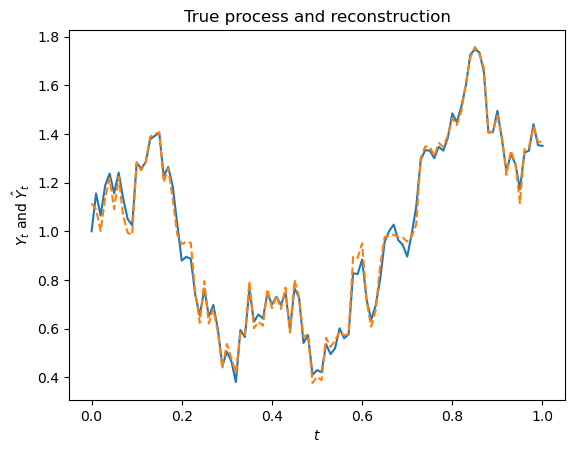

In [172]:
plt.plot(x_axis, Y)
plt.plot(x_axis, Y_pred_1, '--')
plt.title("True process and reconstruction")
plt.xlabel("$t$")
plt.ylabel("$Y_t$ and $\hat{Y}_t$")
plt.show()

### Training the linear, time-homogeneous readout - with regularization

In [173]:
model2 = Lasso(alpha=0.010)
model2.fit(Z, Y)

Lasso(alpha=0.01)

In [174]:
r_sq_2 = model2.score(Z, Y)
print(f"coefficient of determination: {r_sq_2}")

coefficient of determination: 0.9237096985613087


In [175]:
print(f"intercept: {model2.intercept_}")

intercept: 0.9911527715684063


In [176]:
print(f"coefficients: {model2.coef_}")

coefficients: [0.85701386 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [177]:
Y_pred_2 = model2.predict(Z)

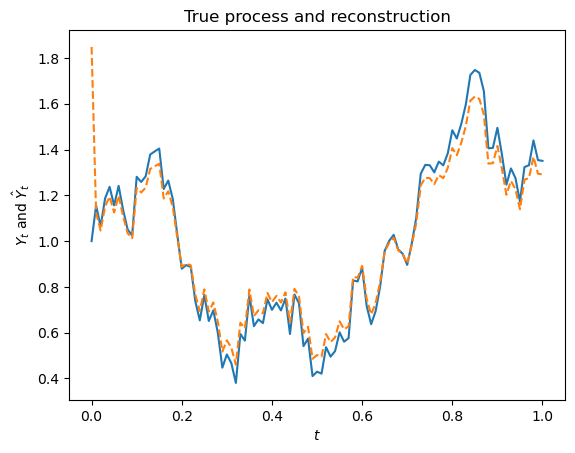

In [178]:
plt.plot(x_axis, Y)
plt.plot(x_axis, Y_pred_2, '--')
plt.title("True process and reconstruction")
plt.xlabel("$t$")
plt.ylabel("$Y_t$ and $\hat{Y}_t$")
plt.show()

### Simulating n_sim times and testing out of sample

In [179]:
n_sim = 1000
k = 15

Y_big = np.zeros(N*n_sim)
Z_big = np.zeros((N*n_sim, k))

Y_big[0:N,] = np.ones(N)
Z_big[0:N,].shape

(101, 15)

In [180]:
for iter in range(n_sim):

    br = Brownian()
    Y = np.zeros(N)
    Y[0] = y0
    brow = br.gen_normal(N+1)
    db =  np.diff(brow)
    for i in range(N-1):
        Y[i+1] = Y[i] + theta * Y[i] * (mu - Y[i]*Y[i]) * step + sigma * db[i]
    dY = np.diff(Y)
    
    Y_big[iter*N:(iter+1)*N] = Y
    
    Y_tens = torch.Tensor(Y)
    Y_tens = torch.reshape(Y_tens, (1, N, 1))
    Y_path_class = signatory.Path(Y_tens, k)
    
    Z = np.zeros((N, k))
    Z[0][0] = 1
    
    for i in range(1,N):
        Z[i] = Y_path_class.signature(0, i+1).numpy()
    
    Z_big[iter*N:(iter+1)*N,:] = Z

In [181]:
model3 = Ridge(alpha=1.0)
model3.fit(Z_big, Y_big)

Ridge()

In [182]:
r_sq_3 = model3.score(Z_big, Y_big)
print(f"coefficient of determination: {r_sq_3}")

coefficient of determination: 0.9653847464909264


In [183]:
print(f"intercept: {model3.intercept_}")

intercept: 0.9936394904424314


In [184]:
print(f"coefficients: {model3.coef_}")

coefficients: [ 8.81760779e-01  8.70266364e-02  7.87754621e-01  3.88092427e-01
 -1.72392405e+00 -1.28457117e+00  8.05024923e-01 -4.34560105e-01
  1.64906953e-01 -5.41343254e-02  1.53698496e-02 -3.92104891e-03
  9.07898535e-04 -1.93375971e-04  3.81755194e-05]


In [186]:
br = Brownian()
Y = np.zeros(N)
Y[0] = y0
brow = br.gen_normal(N+1)
db =  np.diff(brow)
for i in range(N-1):
    Y[i+1] = Y[i] + theta * Y[i] * (mu - Y[i]*Y[i]) * step + sigma * db[i]
    
dY = np.diff(Y)
Y_tens = torch.Tensor(Y)
Y_tens = torch.reshape(Y_tens, (1, N, 1))
Y_path_class = signatory.Path(Y_tens, k)
    
Z = np.zeros((N, k))
Z[0][0] = 1
    
for i in range(1,N):
    Z[i] = Y_path_class.signature(0, i+1).numpy()



In [187]:
Y_pred_3 = model3.predict(Z)

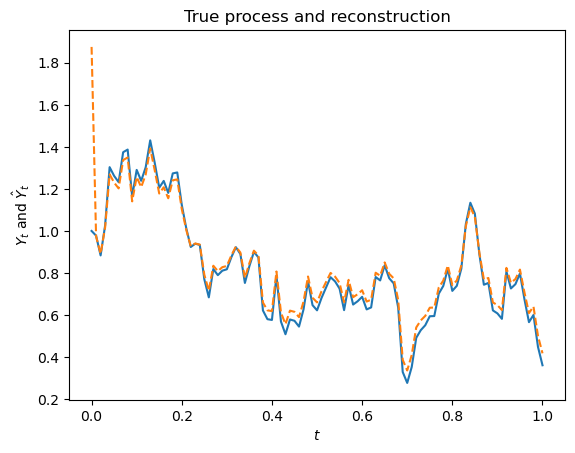

In [188]:
#Y_big[0:N]
plt.plot(x_axis, Y)
plt.plot(x_axis, Y_pred_3, '--')
plt.title("True process and reconstruction")
plt.xlabel("$t$")
plt.ylabel("$Y_t$ and $\hat{Y}_t$")
plt.show()

## 4-Dimensional Ornstein–Uhlenbeck process

### Constructing the process

In [ ]:
y0_4, mu_4 = np.array([1,1,1,1]), np.array([1,1,1,1])
sigma_4 = np.array([[1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]])
theta_4 = np.array([[1,1/2,1/3,1/4], [2,1,2/3,2/4], [3,3/2,1,3/4], [4,2,4/3,1]])
Y_4 = np.zeros((N,4))
Y_4[0] = y0
brow_4 = np.zeros((N+1,4))
#sigma_4 = theta_4

In [ ]:
b = Brownian()

for i in range(4):
    brow_4[:,i] = b.gen_normal(N+1)
db_4 = np.diff(brow_4, axis = 0)

In [ ]:
for i in range(N-1):
    Y_4[i+1] = Y_4[i] + (mu_4 - theta_4 @ Y_4[i]) * step + sigma_4 @ db_4[i]

In [ ]:
for i in range(4):
    plt.plot(x_axis, Y_4[:,i])

plt.title("4-Dimensional Ornstein–Uhlenbeck process")
plt.xlabel("$t$")
plt.ylabel("$Y_i$")
plt.show()

### Constructing the randomized signature

In [ ]:
k_4 = 10
A_4 = np.random.normal(0, 1, size=(4, k_4, k_4))
b_4 = np.random.normal(0, 1, size=(4,k_4))
dY_4 = np.diff(Y_4, axis = 0)
Z_4 = np.zeros((N, k_4))
Z_4[0][0] = 1

In [ ]:
dY_4.shape

In [ ]:
for i in range(N-1):
    for j in range(4):
        Z_4[i+1] = Z_4[i] + (A_4[j]@Z_4[i] + b_4[j])*dY_4[i][j]

In [ ]:
for i in range(6):
    plt.plot(x_axis, Z_4[:,i])

plt.title("Rand. signature of the4-Dimensional Ornstein–Uhlenbeck process")
plt.xlabel("$t$")
plt.ylabel("$Z$")
plt.show()